In [40]:
%matplotlib inline
%mpdaf
import matplotlib.pyplot as plt
import warnings
from astropy.modeling import models, fitting
from astropy.convolution import discretize_model
from astropy.stats import gaussian_sigma_to_fwhm
from mpdaf.obj import gauss_image, gauss_image2

warnings.simplefilter('ignore', UserWarning)

Numpy 1.14.0
Astropy 3.1.dev21491
MPDAF 2.5.dev2570


In [44]:
def plot_images(*img, sharex=True, sharey=True, colorbar=False):
    n = len(img)
    fig, axes = plt.subplots(1, n, sharex=sharex, sharey=sharey, figsize=(4*n, 4), tight_layout=True)
    for ax, im in zip(axes, img):
        cax = ax.imshow(im, origin='lower')
        if colorbar:
            plt.colorbar(cax, ax=ax)

In [3]:
def plot_images_and_profile(*img):
    n = len(img)
    cx = img[0].shape[0] // 2
    fig, axes = plt.subplots(1, n+2, sharex=True, figsize=(3.5*(n+2), 3), tight_layout=True)
    for i, (ax, im) in enumerate(zip(axes, img)):
        cax = ax.imshow(im, origin='lower')
        plt.colorbar(cax, ax=ax)
        axes[-2].plot(im[cx], label=str(i))
        axes[-1].plot(im[cx], label=str(i))
    axes[-2].legend()
    axes[-1].legend()
    axes[-1].set_yscale('log')

## Reference model

Create a Gaussian2D model

In [4]:
shape = (21, 31)
cy, cx = np.array(shape) // 2
fwhmy, fwhmx = 2, 5
rot = 30
theta = np.deg2rad(rot)

In [5]:
m = models.Gaussian2D(1, cy, cx, fwhmy, fwhmx, theta)
yy, xx = np.indices(shape)
gauss = m(yy, xx)
m

<Gaussian2D(amplitude=1., x_mean=10., y_mean=15., x_stddev=2., y_stddev=5., theta=0.52359878)>

## Astropy's `discretize_model`

Discretize should give the same by default (mode center) **except that the result must be transposed**.

In [6]:
%time d = discretize_model(m, (0, shape[0]), (0, shape[1])).T

CPU times: user 2.19 ms, sys: 0 ns, total: 2.19 ms
Wall time: 2.23 ms


/home/simon/.pyenv/versions/3.6.3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


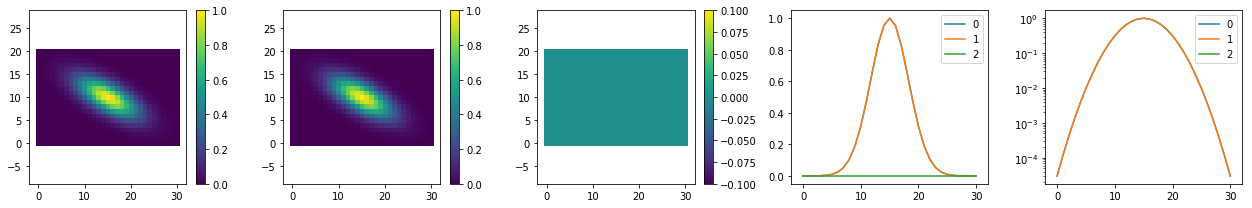

In [7]:
plot_images_and_profile(gauss, d, gauss - d)

Now with oversampling, factor=10

In [8]:
%time d10 = discretize_model(m, (0, shape[0]), (0, shape[1]), mode='oversample', factor=10).T

CPU times: user 4.45 ms, sys: 2.2 ms, total: 6.65 ms
Wall time: 6.59 ms


/home/simon/.pyenv/versions/3.6.3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


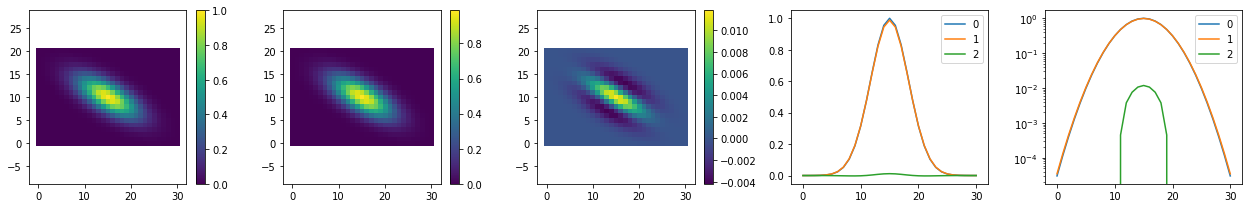

In [9]:
plot_images_and_profile(gauss, d10, gauss - d10)

And with integrate (much slower!)

In [36]:
#%time dint = discretize_model(m, (0, shape[0]), (0, shape[1]), mode='integrate').T

In [37]:
#plot_images_and_profile(gauss, dint, gauss - dint)

/home/simon/.pyenv/versions/3.6.3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


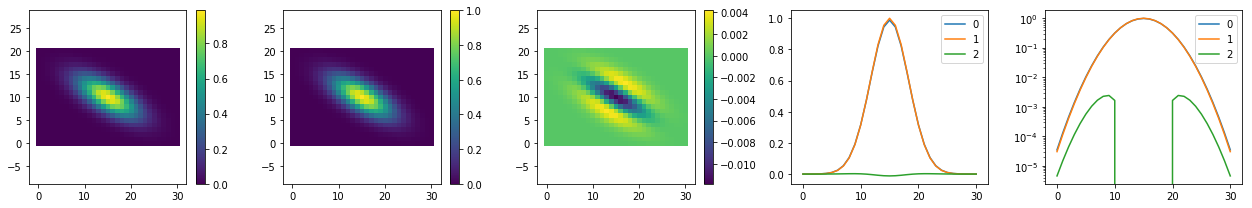

In [13]:
plot_images_and_profile(d10, d, d10 - d)

## Now with MPDAF

In [10]:
im = gauss_image(shape=shape, center=(cy, cx), fwhm=(fwhmy*gaussian_sigma_to_fwhm, fwhmx*gaussian_sigma_to_fwhm), 
                 peak=True, unit_center=None, unit_fwhm=None, rot=-rot)

/home/simon/.pyenv/versions/3.6.3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


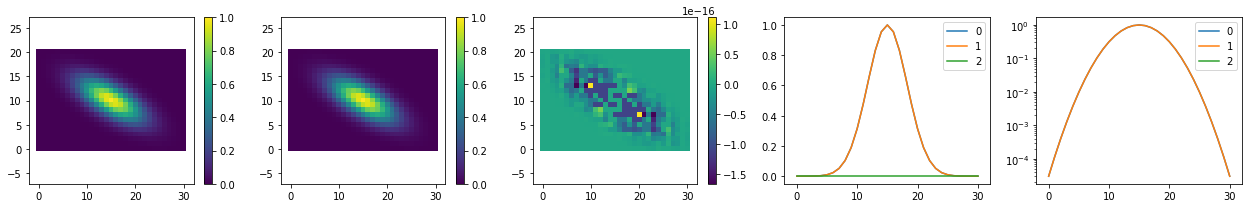

In [11]:
plot_images_and_profile(gauss, im.data, gauss - im.data)

In [14]:
im2 = gauss_image2(shape=shape, center=(cy, cx), fwhm=(fwhmy*gaussian_sigma_to_fwhm, fwhmx*gaussian_sigma_to_fwhm), 
                   peak=True, unit_center=None, unit_fwhm=None, rot=-rot)

/home/simon/.pyenv/versions/3.6.3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


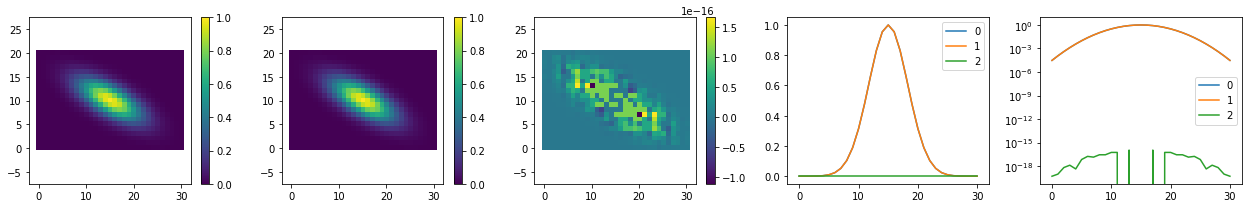

In [15]:
plot_images_and_profile(im.data, im2.data, im.data - im2.data)

In [16]:
im10 = gauss_image(shape=shape, center=(cy, cx), fwhm=(fwhmy*gaussian_sigma_to_fwhm, fwhmx*gaussian_sigma_to_fwhm), peak=True, unit_center=None, unit_fwhm=None, factor=10, rot=-rot)

/home/simon/.pyenv/versions/3.6.3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


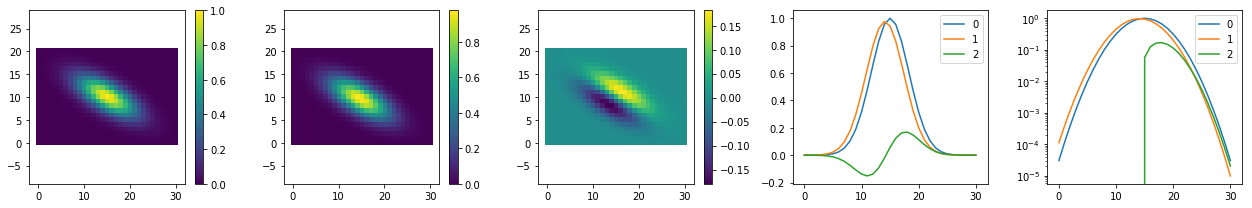

In [17]:
plot_images_and_profile(im.data, im10.data, im.data - im10.data)

/home/simon/.pyenv/versions/3.6.3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


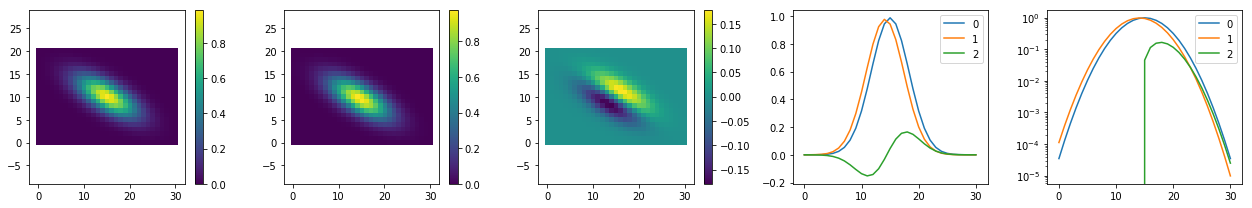

In [18]:
plot_images_and_profile(d10, im10.data, d10 - im10.data)

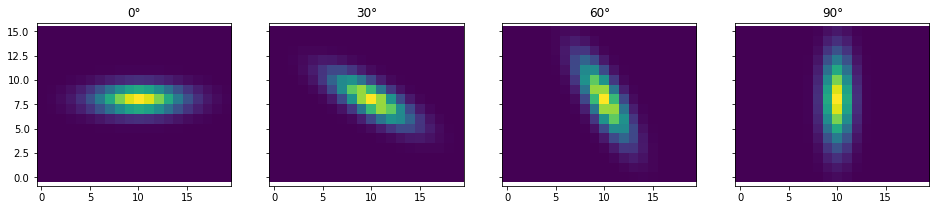

In [68]:
xx, yy = np.indices((16, 20))
angles = (0, 30, 60, 90)
fig, axes = plt.subplots(1, len(angles), sharex=True, sharey=True, figsize=(4*len(angles),3))
for ax, theta in zip(axes, angles):
    m = models.Gaussian2D(1, 8, 10, 1, 3, theta=np.deg2rad(theta))
    ax.imshow(m(xx, yy), origin='lower')
    ax.set_title(f'{theta}°')

In [56]:
from scipy.ndimage import rotate

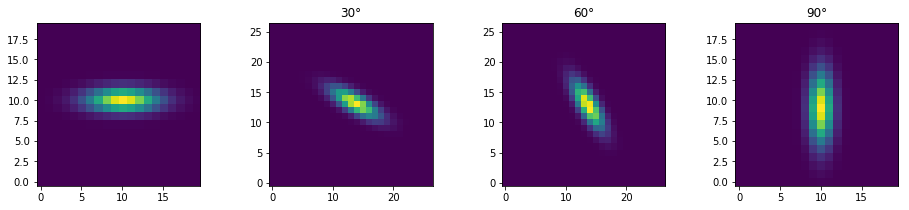

In [65]:
yy, xx = np.indices((20, 20))
m = models.Gaussian2D(1, 10, 10, 1, 3, theta=0)
fig, axes = plt.subplots(1, len(angles), figsize=(4*len(angles),3))
axes[0].imshow(m(yy, xx), origin='lower')
for ax, theta in zip(axes[1:], angles[1:]):
    im = rotate(m(yy, xx), theta, axes=(1,0))
    ax.imshow(im, origin='lower')
    ax.set_title(f'{theta}°')